In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv('/content/spam.csv', encoding='latin-1')

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4704,ham,Hey anyway i have to :-),NaN,NaN,NaN
5008,ham,My mobile number.pls sms ur mail id.convey reg...,NaN,NaN,NaN
2813,ham,"Alright if you're sure, let me know when you'r...",NaN,NaN,NaN
5018,ham,Great! How is the office today?,NaN,NaN,NaN
1656,ham,Yes I posted a couple of pics on fb. There's s...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
# data cleaning -> EDA (exploratory data analysis) -> text prepossing -> model building -> evaluation -> improvements -> website -> deploy in heroku

Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
#  movst values are mising in unnamed last 3 columns so remove them

In [9]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)
#inplace as these are permanent values

In [10]:
df.sample(5)

,v1,v2
2230,ham,Hey... Thk we juz go accordin to wat we discus...
1181,ham,You flippin your shit yet?
186,ham,"Haha awesome, be there in a minute"
1182,ham,"K give me a sec, breaking a &lt;#&gt; at cstore"
3982,ham,Nationwide auto centre (or something like that...


In [11]:
#columns names are renamed as they are not descritive
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [12]:
df.sample(5)

,target,text
5432,ham,Thanx a lot 4 ur help!
3341,ham,You will go to walmart. I.ll stay.
1248,ham,HI HUN! IM NOT COMIN 2NITE-TELL EVERY1 IM SORR...
501,ham,When can Ì_ come out?
3330,ham,How much it will cost approx . Per month.


In [13]:
#label encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [14]:
 df['target'] = encoder.fit_transform(df['target'])

In [15]:
#ham -> 0
#spam -> 1

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
#missing values check
df.isnull().sum()

,0
target,0
text,0


In [18]:
# check duplicate values
df.duplicated().sum()

403

In [19]:
# there are 401=3 duplicates so remice them
df = df.drop_duplicates(keep='first')
#keep -> phla wala rkho 2nd wala duplicate hata do means

In [20]:
df.duplicated().sum()

0

In [21]:
df.shape

(5169, 2)

EDA(exploratory data analysis)

In [22]:
#data ke bare mei understanding


In [23]:
df['target'].value_counts()
#to know how much % is ham and spam

,count
target,
0,4516
1,653


In [24]:
#we can use pychart for better representation

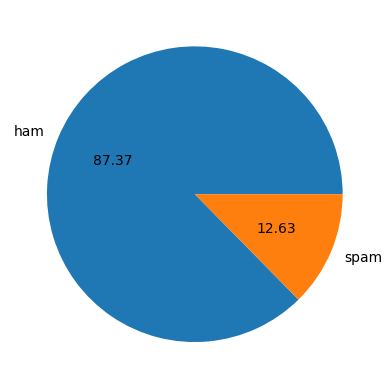

In [63]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()
## plt.show to direct show th pir chart
## autopct mei %0.2f means decimal ke bad 2 points tk

In [26]:
#data is imbalanced as ham is so much than spam


In [27]:
## how much aplha and words and setence are used in sms
import nltk
##natural lang toolkit

In [28]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [29]:
##deeper analysis
## 3 new columns


In [30]:
df['num_characters'] = df['text'].apply(len)
##len -> nu. of char used

In [31]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [32]:
# fetch the number fo words

In [33]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)) )
#list of words are formed and now  with len count is done ?

In [34]:
df.head()


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [35]:
#for no. of sentences
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
## found number of sentences

In [36]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
## for ham sms
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
#for spam sms
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [39]:
#spams are large

In [40]:
#lets plot histograph
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

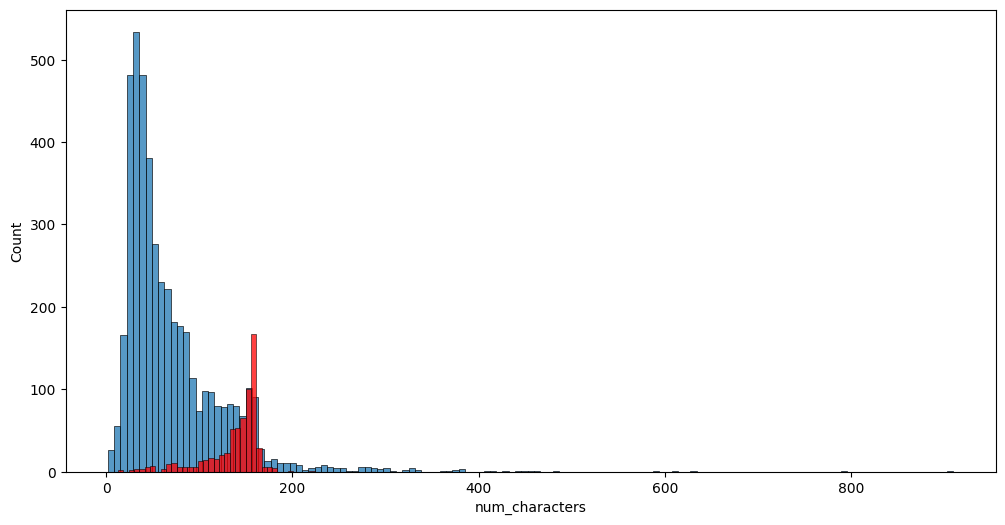

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

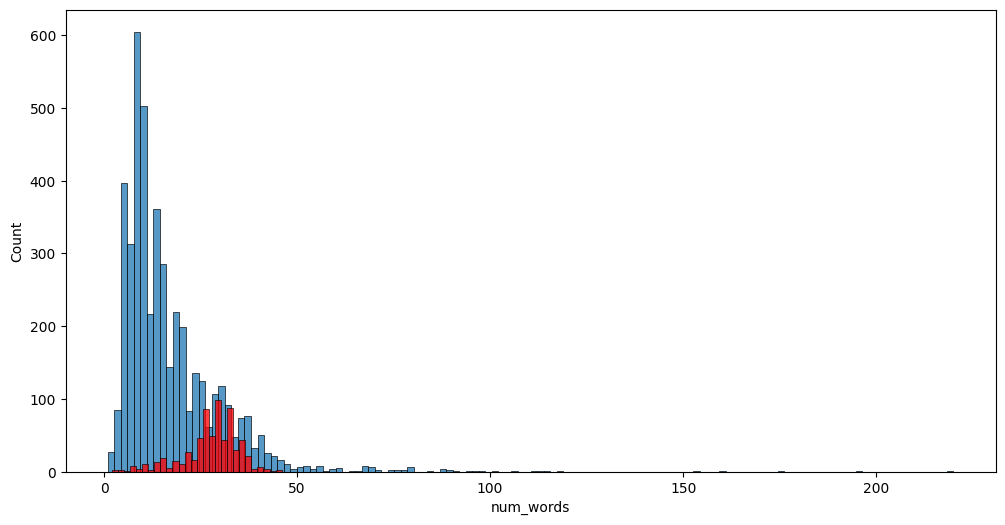

In [42]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

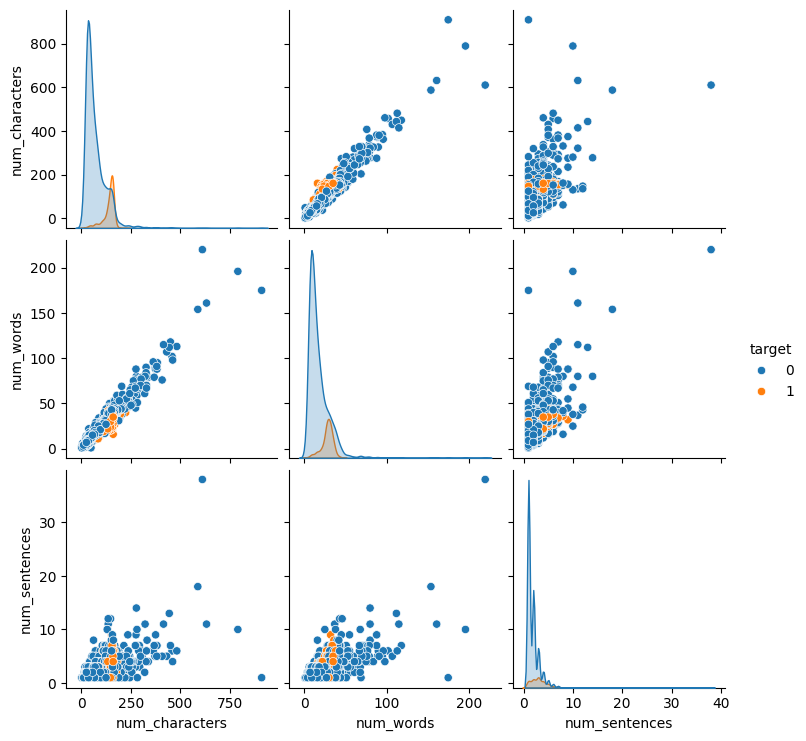

In [43]:
sns.pairplot(df,hue='target')
#to se their apus ka kaisa relation hai

In [44]:
# we have to much outliers
# well keep the num char wala column

DAta preprocessing


In [45]:
#lower case

In [46]:
def transform_text(text):
  text  = text.lower()
  text = nltk.word_tokenize(text)
  ##tokenize kr diya

  y = []
  #removing special characters
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))
  return ' '.join(y)

In [47]:
import nltk
nltk.download('stopwords')
##stop words removes(sentence formation wale words removed)
from nltk.corpus import stopwords
stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [48]:
##for punchuation marks
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [49]:
## steming

In [50]:
from nltk.stem.porter import PorterStemmer # Corrected the typo from PorterStremmer to PorterStemmer
ps = PorterStemmer()
ps.stem('loved')# sare words ko root form m le aata h

'love'

In [51]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [52]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [53]:
df['transform_text'] = df['text'].apply(transform_text)

In [54]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [55]:
## word cloud banaenge (important words ko genrate krega )
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [56]:
spam_wc= wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))

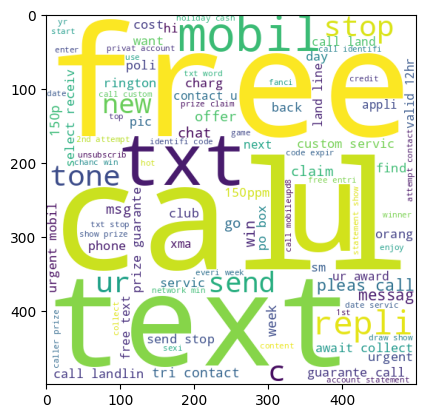

In [57]:
plt.imshow(spam_wc)

In [58]:
ham_wc= wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))

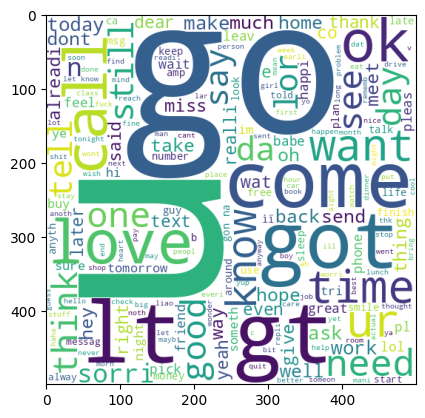

In [65]:
plt.imshow(spam_wc)

In [66]:
# top 30 words used in ham and spam
spam_corpus=[] ##empty list hai yeh
for msg in df[df['target']==1]['transform_text'].tolist():
  for word in msg.split():## sare words ko alg krna h
    spam_corpus.append(word)


In [67]:
len(spam_corpus)


9939

In [68]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])## dict create in which har word jitni bar aaya h voh info hoga

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

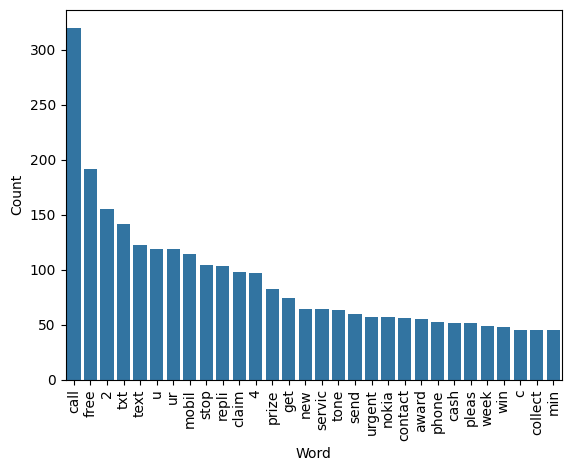

In [69]:
from collections import Counter

# Create a DataFrame from the most common words and their counts
spam_corpus_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Count'])

# Create the bar plot using 'Word' for the x-axis and 'Count' for the y-axis
sns.barplot(x='Word', y='Count', data=spam_corpus_df)
plt.xticks(rotation='vertical') # Rotate x-axis labels for better readability
plt.show()

In [70]:
# top 30 words used in ham and spam
ham_corpus=[] ##empty list hai yeh
for msg in df[df['target']==0]['transform_text'].tolist():
  for word in msg.split():## sare words ko alg krna h
    ham_corpus.append(word)


In [71]:
len(ham_corpus)

35404

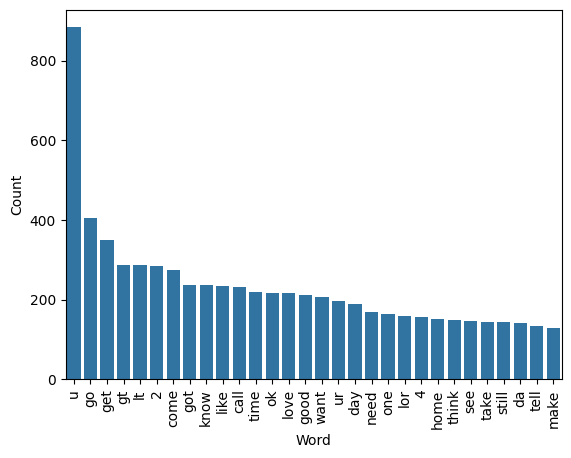

In [72]:
from collections import Counter

# Create a DataFrame from the most common words and their counts
ham_corpus_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Count'])

# Create the bar plot using 'Word' for the x-axis and 'Count' for the y-axis
sns.barplot(x='Word', y='Count', data=ham_corpus_df)
plt.xticks(rotation='vertical') # Rotate x-axis labels for better readability
plt.show()

MOdel building

In [141]:
#textual data -> naive based
##target -> num but input is not -> textual so change it

#text vectorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [142]:
X = tfidf.fit_transform(df['transform_text']).toarray()

In [143]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [144]:
X.shape

(5169, 3000)

In [145]:
y = df['target'].values

In [146]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [149]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [150]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [151]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8723404255319149
[[782 114]
 [ 18 120]]
0.5128205128205128


In [152]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9787234042553191
[[889   7]
 [ 15 123]]
0.9461538461538461


In [153]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [154]:
#precision of bnb is bernaulli is best among 3
#but after tfidf precision of mnb is best =1 so we will take it

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [156]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)
      ##objects bane h yeh

In [157]:
#dict where key mei algo name and  values mei objects the
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [158]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision

In [162]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9690522243713733, 0.9274193548387096)

In [163]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix # Import accuracy_score and precision_score

def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred) # Use the imported accuracy_score function
  precision = precision_score(y_test,y_pred) # Use the imported precision_score function

  return accuracy,precision

accuracy_scores = []  # Renamed to avoid conflict with imported function
precision_scores = [] # Renamed to avoid conflict with imported function

for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
  print("For",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)


  accuracy_scores.append(current_accuracy) # Append to the renamed list
  precision_scores.append(current_precision) # Append to the renamed list

For SVC
Accuracy -  0.9690522243713733
Precision -  0.9274193548387096
For KN
Accuracy -  0.9052224371373307
Precision -  0.9761904761904762
For NB
Accuracy -  0.9787234042553191
Precision -  0.9461538461538461
For DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For LR
Accuracy -  0.9671179883945842
Precision -  0.9642857142857143
For RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For AdaBoost
Accuracy -  0.9245647969052224
Precision -  0.8488372093023255
For BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Acuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [127]:





performance_df

,Algorithm,Acuracy,Precision
5,RF,0.975822,0.982906
1,KN,0.905222,0.976190
8,ETC,0.974855,0.974576
4,LR,0.967118,0.964286
2,NB,0.978723,0.946154
0,SVC,0.969052,0.927419
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217
6,AdaBoost,0.924565,0.848837


In [128]:
#naive based is giving both things best
performance_df1 = pd.melt(performance_df,id_vars='Algorithm')

In [129]:
performance_df1

,Algorithm,variable,value
0,RF,Acuracy,0.975822
1,KN,Acuracy,0.905222
2,ETC,Acuracy,0.974855
3,LR,Acuracy,0.967118
4,NB,Acuracy,0.978723
5,SVC,Acuracy,0.969052
6,xgb,Acuracy,0.967118
7,GBDT,Acuracy,0.946809
8,BgC,Acuracy,0.958414
9,AdaBoost,Acuracy,0.924565


model imporvemnet


In [130]:
#change the max_feature parameter of tfidf

In [131]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [132]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [136]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [137]:
#naive based ka accuracy baad gya

In [138]:
new_df_scaled= new_df.merge(temp_df,on='Algorithm')

In [139]:
new_df_scaled

,Algorithm,Acuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
1,KN,0.905222,0.976190,0.905222,0.976190,0.905222,0.976190
2,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
3,LR,0.967118,0.964286,0.967118,0.964286,0.967118,0.964286
4,NB,0.978723,0.946154,0.978723,0.946154,0.978723,0.946154
5,SVC,0.969052,0.927419,0.969052,0.927419,0.969052,0.927419
6,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
7,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
8,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
9,AdaBoost,0.924565,0.848837,0.924565,0.848837,0.924565,0.848837


****

In [140]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb, open ('model.pkl','wb'))